In [1]:
import os
import datetime
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from PIL import Image

In [2]:
network = tf.keras.applications.resnet50.ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [3]:
path_to_file = tf.keras.utils.get_file('image.jpg', 'https://vetstreet.brightspotcdn.com/dims4/default/7cc218c/2147483647/thumbnail/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2Fa5%2F69%2Fe639b7ab40c2a290e3296de726d8%2FPersian-AP-PIFN6J-645sm3614.jpg')
img = Image.open(path_to_file)
im = np.array(img)

49152/42151 [==================================] - 0s 0us/step


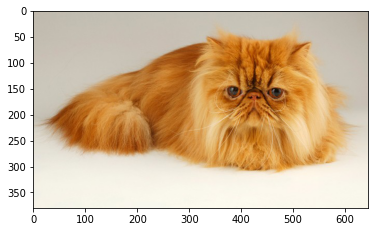

In [4]:
plt.imshow(im)

In [5]:
im.shape

(380, 645, 3)

In [6]:
i, j = 100, 300
cropped_im = im[i:i + 224, j:j + 224, :]

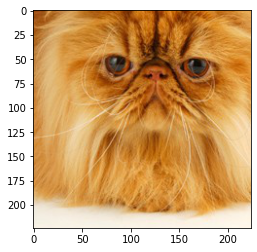

In [7]:
plt.imshow(cropped_im)

In [8]:
processed_im = tf.keras.applications.resnet50.preprocess_input(tf.cast(cropped_im, tf.float32))

In [9]:
probs = network(processed_im[np.newaxis, ...])

In [10]:
np.argmax(probs)

283

In [11]:
network.layers

In [12]:
feature_extractor = tf.keras.Model(inputs=network.input, outputs=network.layers[-2].output)

In [13]:
out = feature_extractor(processed_im[np.newaxis, ...])

In [14]:
out.shape

TensorShape([1, 2048])

In [15]:
(x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 8s 0us/step


In [16]:
x_train, y_train = x[:200], y[:200]
x_test, y_test = x_test[:100], y_test[:100]

In [17]:
def get_embeddings(x):
  all_embs = []
  for im in x:
    im = tf.image.resize(im, size=(224, 224))
    im = tf.keras.applications.resnet50.preprocess_input(tf.cast(im, tf.float32))
    embedding = feature_extractor(im[np.newaxis, ...])
    all_embs.append(embedding.numpy()[0])

  return np.array(all_embs)

In [18]:
train_embeddings = get_embeddings(x_train)

In [19]:
test_embeddings = get_embeddings(x_test)

In [20]:
train_embeddings.shape

(200, 2048)

In [21]:
test_embeddings.shape

(100, 2048)